In [1]:
%matplotlib inline

import sys
sys.path.append("..") # This allows for importing from other directories above
import numpy as np

from models.adaboost_mh import AdaBoostMH
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the data
X_train = np.load('../data/pendigits_train_data.npy')
y_train = np.load('../data/pendigits_train_labels.npy')
X_test = np.load('../data/pendigits_test_data.npy')
y_test = np.load('../data/pendigits_test_labels.npy')

In [2]:
# Test out schapire implementation
T = 10
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)
W_init = True
verbose = False
model1 = AdaBoostMH(X_train, y_train, X_test, y_test)
# tr_err_s, te_err_s, gammas_s, D_ts_s = model1.run_schapire(T, clf_tree, W_init, verbose)
# tr_err_k, te_err_k, gammas_k, D_ts_k = model1.run_kegl(T, clf_tree, W_init, verbose)

In [3]:
# Get all errors for plotting
def get_error_for_T_rounds(model, T, W_init, model_type):
    clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)
    if model_type == 'S':
        err_tr = [model.run_schapire(T, clf_tree, W_init, False)[0] for t in range(T)]
        err_te = [model.run_schapire(T, clf_tree, W_init, False)[1] for t in range(T)]
    elif model_type == 'K':
        err_tr = [model.run_kegl(T, clf_tree, W_init, False)[0] for t in range(T)]
        err_te = [model.run_kegl(T, clf_tree, W_init, False)[1] for t in range(T)]
    elif model_type == 'F':
        err_tr = [model.run_factorized(T, clf_tree, W_init, False)[0] for t in range(T)]
        err_te = [model.run_factorized(T, clf_tree, W_init, False)[1] for t in range(T)]
    return (err_tr, err_te)

In [4]:
def plot_error(err_tr, err_te, title):
    T = len(err_tr)
    ts = np.linspace(1, T, num=T)
    plt.plot(ts, err_tr, label='Training Error')
    plt.plot(ts, err_te, label='Testing Error')
    plt.legend(loc='best')
    plt.xlabel("T")
    plt.title(title)

In [5]:
err_tr_S, err_te_S = get_error_for_T_rounds(model1, T, True, 'S')

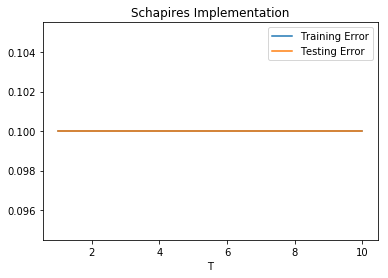

In [6]:
# Plot Training and Testing Error for Schapire's implementation
plot_error(err_tr_S, err_te_S, 'Schapires Implementation')

In [7]:
err_tr_K, err_te_K = get_error_for_T_rounds(model1, T, True, 'K')

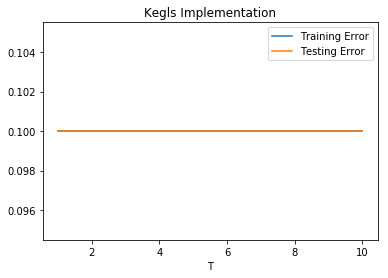

In [8]:
# Plot Training and Testing Error for Kegl's implementation
plot_error(err_tr_K, err_te_K, 'Kegls Implementation')